In [1]:
import cv2 
import numpy as np
import imutils
from scipy import ndimage
from scipy.spatial import distance
%matplotlib inline
from matplotlib import pyplot as plt
import glob

In [2]:
# some global params
blocksize = 5 # for adaptiveThreshold. based on image size and resolution. some sort of smoothing size. keep it odd. 
thresholding_binary_value = 3 # for cv2.adaptiveThreshold based on details in the original pic. 3 for high detail... otherwise increase it. keep it odd.

dpi=90

output_size=28 # size of the image to be cut out.  in pixels.

rootdir="/Users/hershalpandya/data/temp_delete/images/livecell_train_val_images/A172//"

all_image_files=glob.glob(rootdir+"A172_Phase_A7_?_00d00h00m_1.tif")

print (len(all_image_files))
print (all_image_files)
image_file=all_image_files[1]
print (image_file)

2
['/Users/hershalpandya/data/temp_delete/images/livecell_train_val_images/A172/A172_Phase_A7_2_00d00h00m_1.tif', '/Users/hershalpandya/data/temp_delete/images/livecell_train_val_images/A172/A172_Phase_A7_1_00d00h00m_1.tif']
/Users/hershalpandya/data/temp_delete/images/livecell_train_val_images/A172/A172_Phase_A7_1_00d00h00m_1.tif


In [3]:
# chosen_file=np.random.randint(len(all_image_files))
# print (chosen_file)

In [4]:
extracted_images_array=[]

img_id:  0  n cells found: 63
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (5

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:195: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


img_id:  1  n cells found: 53
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)
Original Dimensions :  (56, 56)
Resized Dimensions :  (28, 28)


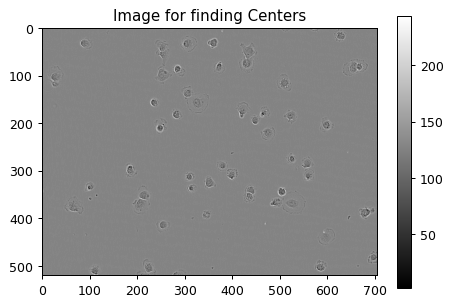

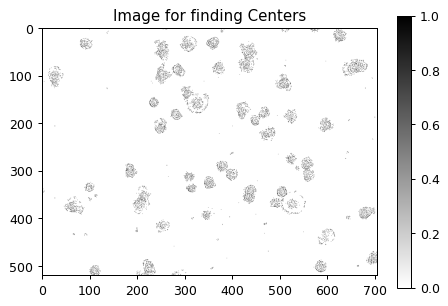

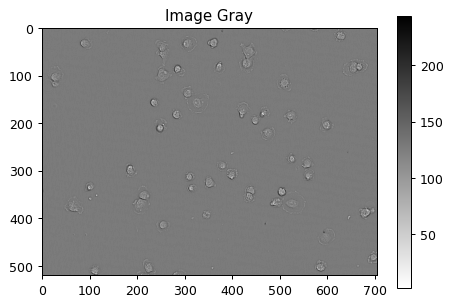

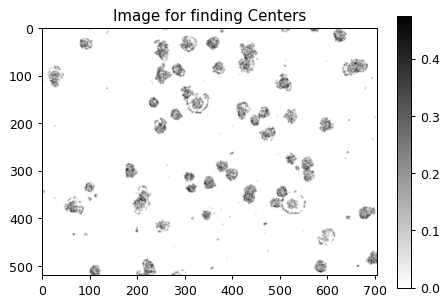

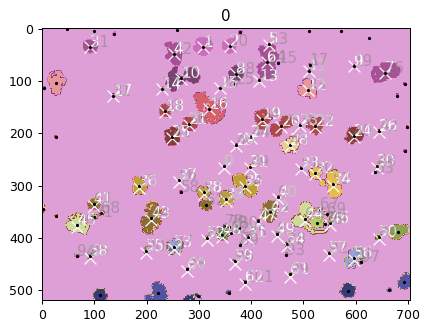

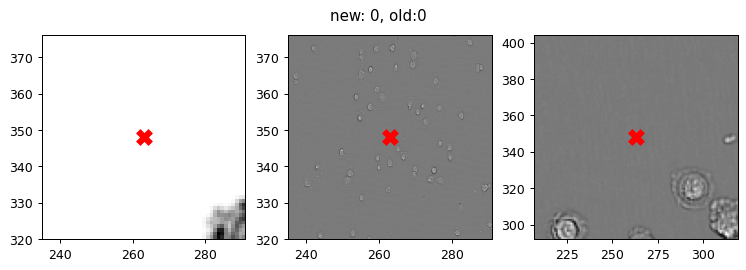

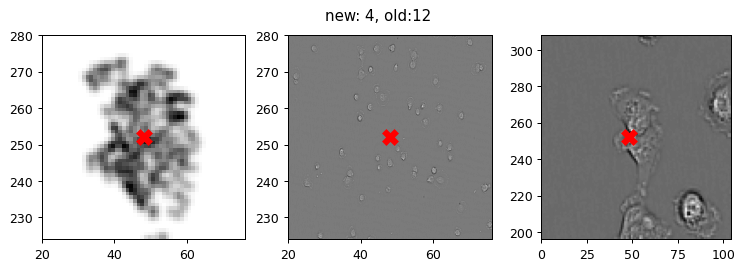

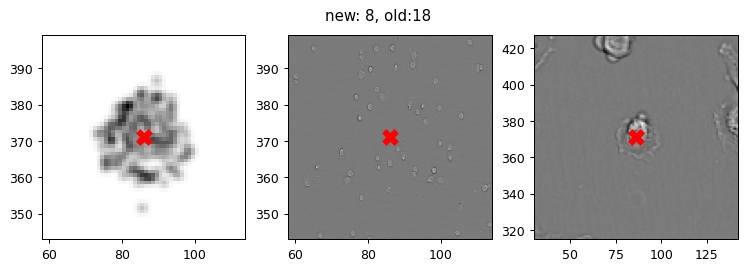

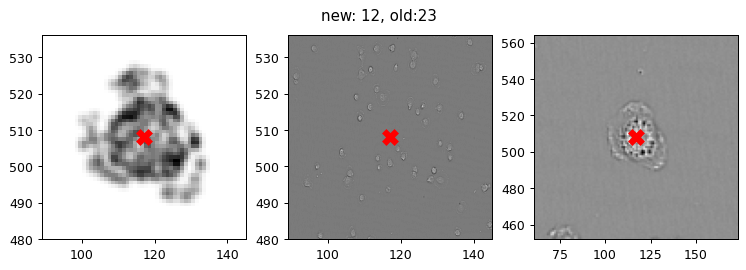

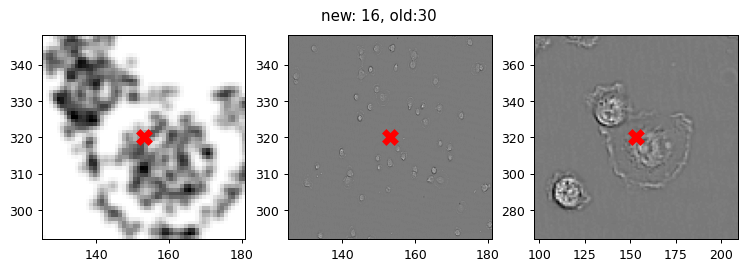

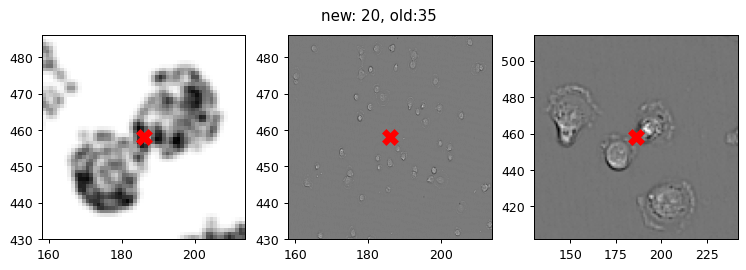

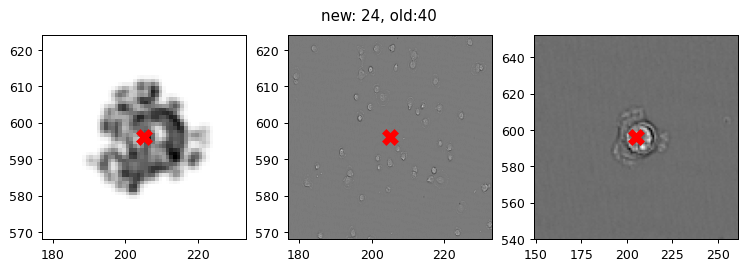

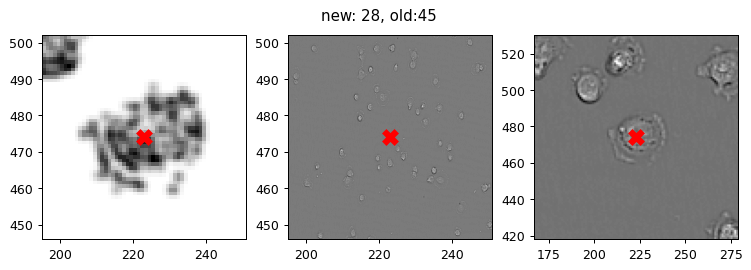

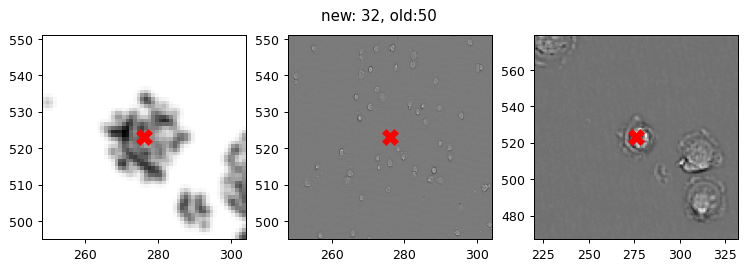

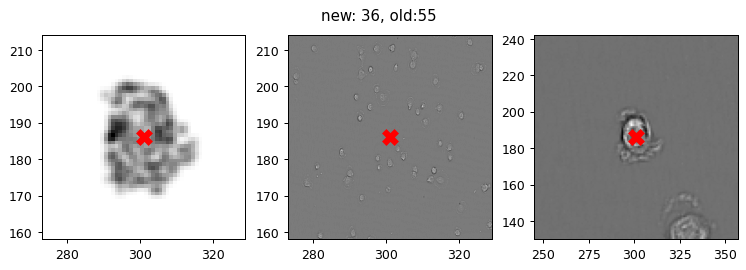

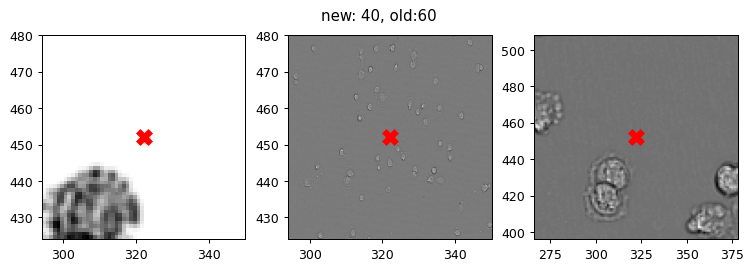

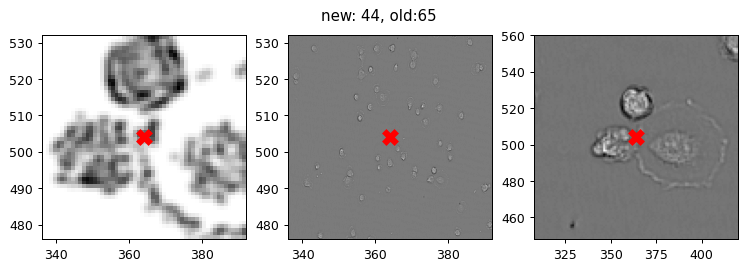

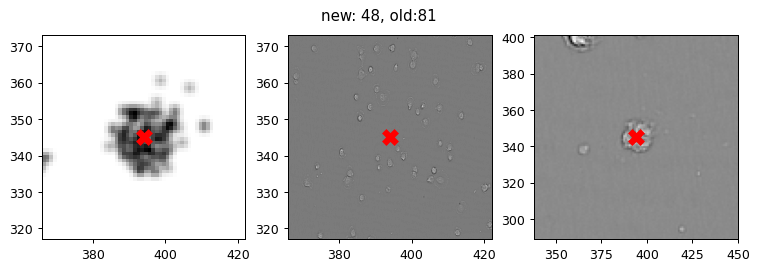

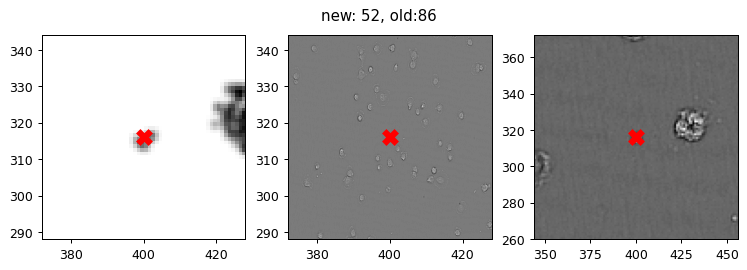

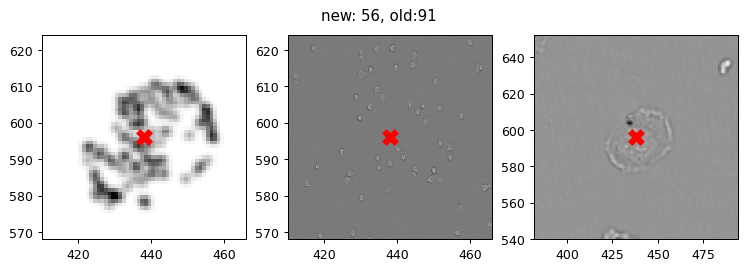

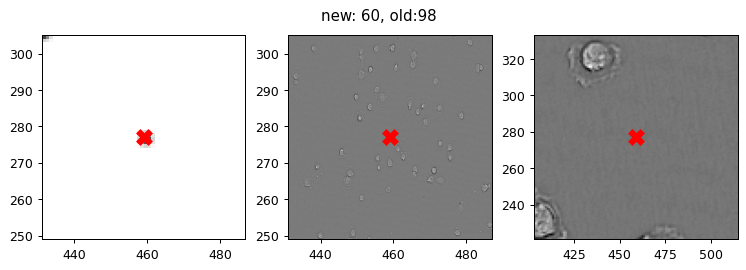

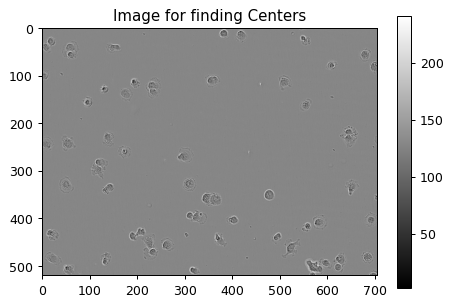

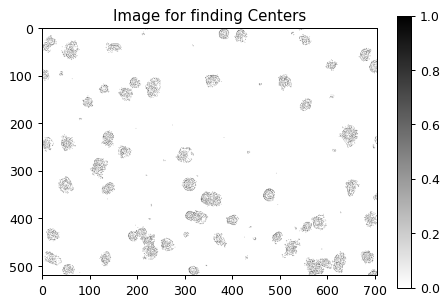

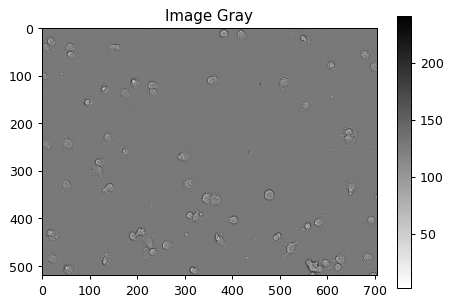

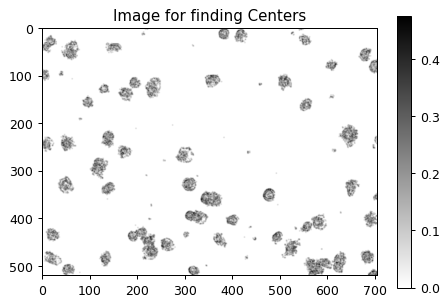

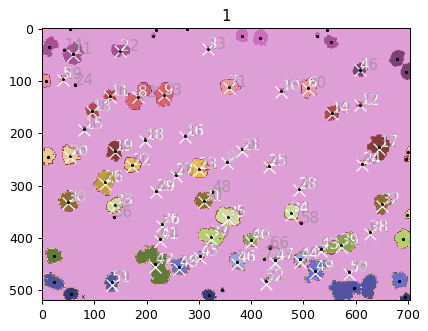

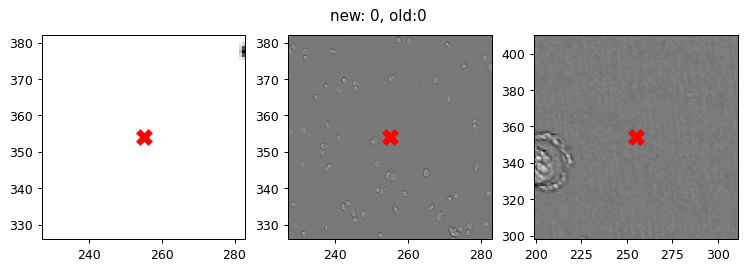

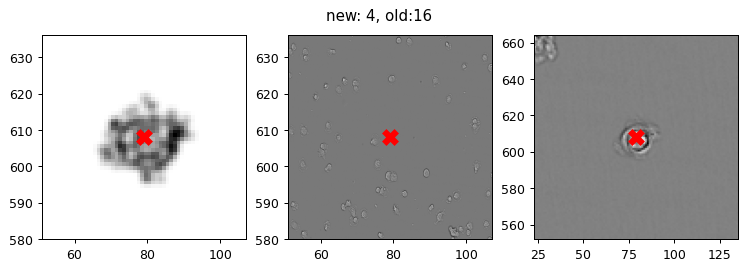

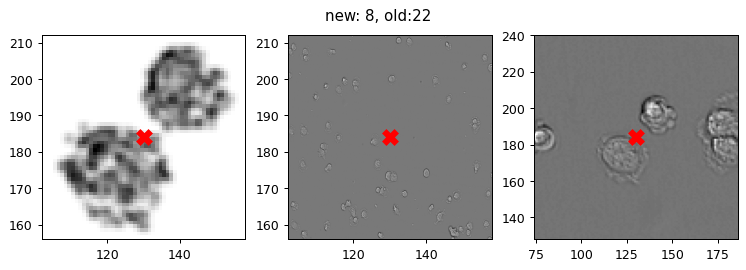

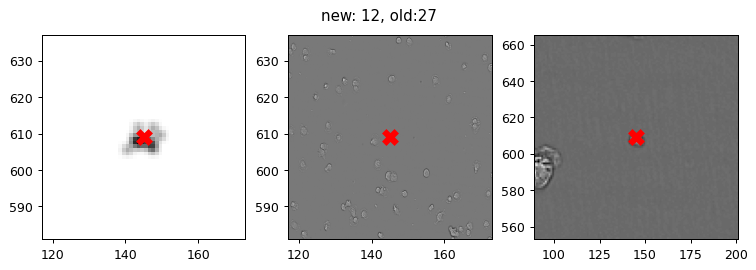

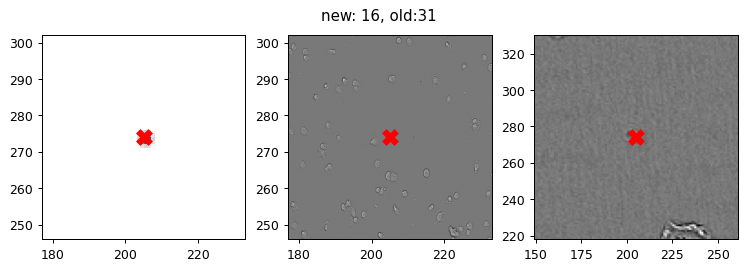

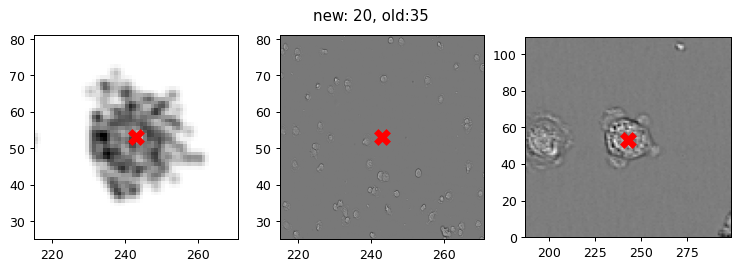

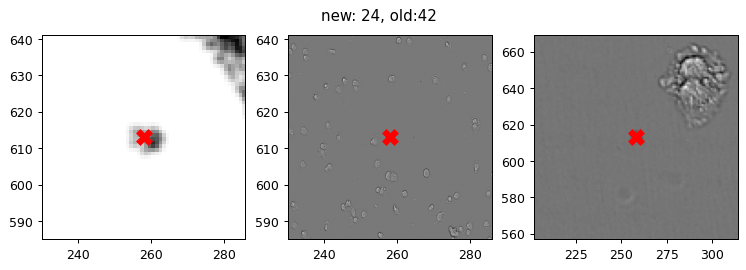

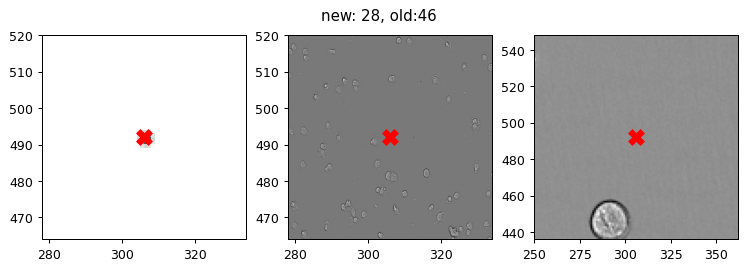

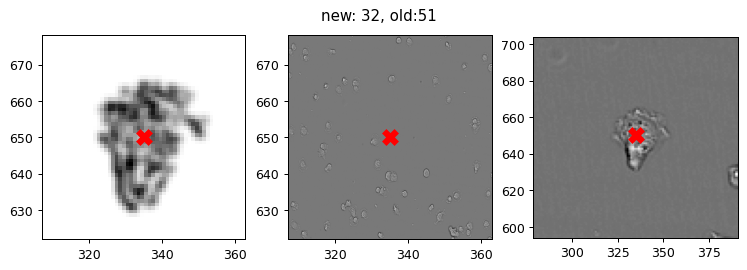

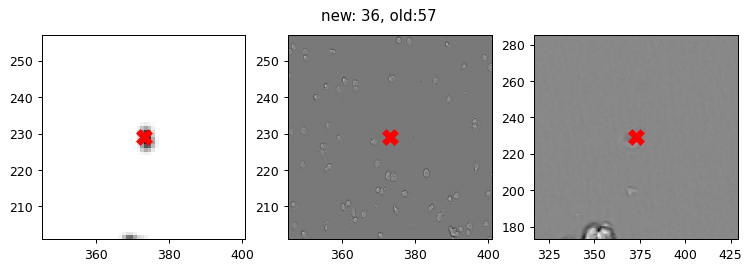

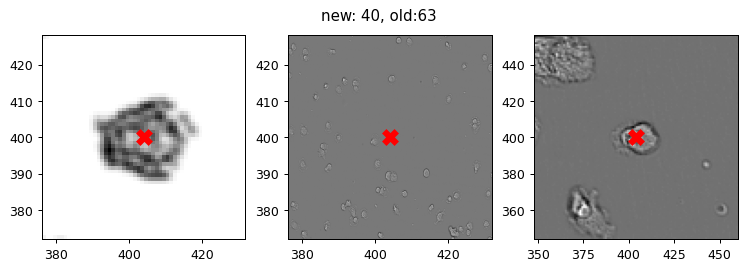

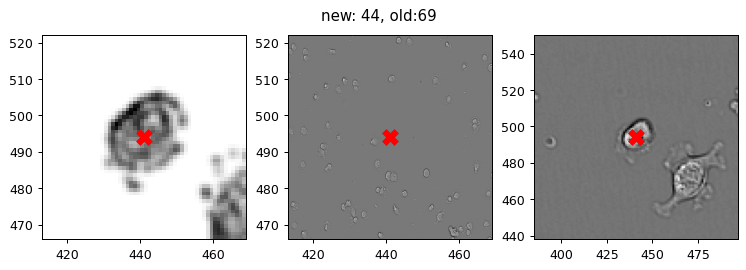

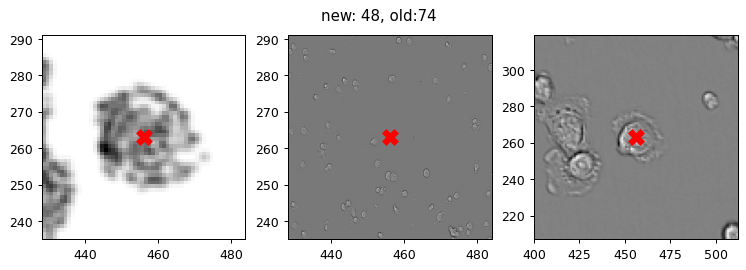

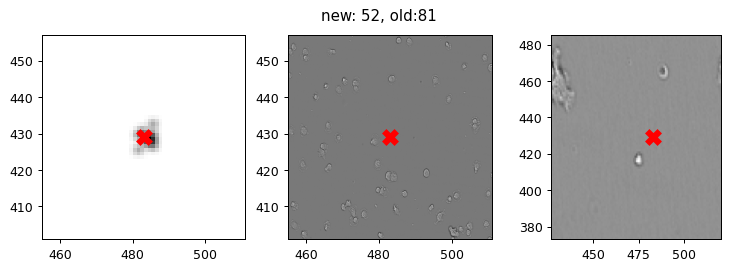

In [5]:
for img_id, image_file in enumerate(all_image_files):
#     if img_id!=chosen_file:
#         continue
    #------------------------
    # IMAGE MANIPULATION BEGIN
    #------------------------
    img = cv2.imread(image_file)

    # grayscale the image for normalizing values to 0 to 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # renaming variables in case later on you want to change which version of images are used beyond this point:
    img_for_segmenting = img
    img_for_finding_centers = np.copy(img)


    plt.figure(dpi = dpi)
    plt.title("Image for finding Centers")
    plt.imshow(img_for_finding_centers,cmap='gray')
    plt.colorbar()
    
    # apply adaptive threshold for contrasting image.
    # both mean and gauss perform almost same. We'll go with gauss.
    thresh_gauss = cv2.adaptiveThreshold(img_for_finding_centers, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, thresholding_binary_value, blocksize)

#     otsu_threshold, temp = cv2.threshold(img_for_finding_centers, 0, 255, 
#                                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # create a composite image after applying gaussian trheshold 
    img_for_finding_centers = np.asarray(img_for_finding_centers, np.float64)
    mask=np.asarray(img_for_finding_centers>thresh_gauss, np.float64)
    
    img_for_finding_centers=cv2.multiply(img_for_finding_centers,mask)
    img_for_finding_centers/=np.max(img_for_finding_centers)
    
    plt.figure(dpi = dpi)
    plt.title("Image for finding Centers")
    plt.imshow(img_for_finding_centers,cmap='binary')
    plt.colorbar()
    
    # blur the image.
    img_for_finding_centers  = cv2.GaussianBlur(img_for_finding_centers, (5, 5), 0)

    # dilate the image.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
    img_for_finding_centers = cv2.dilate(img_for_finding_centers, kernel, iterations=3)

    #------------------------
    # IMAGE MANIPULATION END
    #------------------------
    
    
    plt.figure(dpi = dpi)
    plt.title("Image Gray")
    plt.imshow(img,cmap='binary')
    plt.colorbar()
    
    
    plt.figure(dpi = dpi)
    plt.title("Image for finding Centers")
    plt.imshow(img_for_finding_centers,cmap='binary')
    plt.colorbar()

    #------------------------
    # IMAGE SEGMENTATION BEGIN
    #------------------------

    # assign labels to the blobs/structures : main segmentation job.
    img_to_label = np.copy(img_for_finding_centers)
    img_to_label[img_to_label!=0]=1

    connectivity = ndimage.generate_binary_structure(2,2)
    labels, n_labels = ndimage.label(img_to_label, connectivity)

    # find the center location in each blob/structure.
    crosses_x_, crosses_y_ = np.array([np.round(np.mean(np.argwhere(labels==i),axis=0),0) for i in range(n_labels)]).T
    old_ids_ = np.arange(len(crosses_x_))

    # calculate distance to the boundary of the picture. 
    # create a mask exclude the cells which are cropped during imaging 
    distance_to_edges = np.array([np.min([crosses_x_[i],
                                          crosses_y_[i],
                                          np.absolute(crosses_x_[i] - labels.shape[0]), 
                                          np.absolute(crosses_y_[i] - labels.shape[1])
                                         ])
                                 for i in range(len(crosses_x_))
                                 ])
    select_cells = distance_to_edges>output_size


    # calculate pairwise distances between crosses. 
    crosses = np.array([crosses_x_, crosses_y_]).T
    pdistances = distance.squareform(distance.pdist(crosses))

    keep_one_cross = np.argwhere(pdistances<output_size)
    keep_one_cross = np.array([i for i in keep_one_cross if i[0]!=i[1]])

    # create a mask to remove blobs labelled too close to each other
    # out of two blobs, the bigger one is retained. yay!
    remove_crosses=[]
    for i in keep_one_cross:

        if i[0] in remove_crosses or i[1] in remove_crosses:
            continue

        s0= np.sum(img_for_finding_centers[labels==i[0]])
        s1= np.sum(img_for_finding_centers[labels==i[1]])

        if s0<=s1:
            remove_crosses.append(i[0])
        else:
            remove_crosses.append(i[1])

    remove_cells2 = np.array([i in remove_crosses for i in range(len(crosses_x_))])
    select_cells2 = ~remove_cells2


    ## apply mask on crosses and finally find the centers of blobs you want to extract:

    crosses_x = crosses_x_[select_cells&select_cells2]
    crosses_y = crosses_y_[select_cells&select_cells2]
    old_ids = old_ids_[select_cells&select_cells2] # redundancy but for debugging here.


    print ("img_id: ",img_id," n cells found:" ,len(crosses_x))
    if img_id%20==0 or 1==1:
        #----
        # optional plotting
        # ---
        cid_start=0
        cid_stop=len(crosses_y)

        plt.figure(dpi=dpi)
        plt.title(img_id)
        plt.imshow(labels,cmap='tab20b_r')
        plt.scatter(crosses_y[cid_start:cid_stop], 
                    crosses_x[cid_start:cid_stop]*1.01,
                    s=90,c='w',marker='x',lw=1)
        for cid in range(cid_start,cid_stop):
            plt.text(crosses_y[cid],
                     crosses_x[cid],
                     cid,fontsize=12,c='w')

        plt.scatter(crosses_y_, crosses_x_,s=10,c='k',marker='.')
        for cid in np.arange(len(crosses_y_))[select_cells]:
            plt.text(crosses_y_[cid],crosses_x_[cid],
                     cid,fontsize=12,c='grey',alpha=0.5)

    for i in np.arange(len(crosses_x))[::4]:

        n=int(crosses_x[i])
        m=int(crosses_y[i])

        ln=np.max( [n - output_size,0] )
        hn=np.min( [n + output_size, img_for_finding_centers.shape[0] ] )

        lm=np.max( [m - output_size,0] )
        hm=np.min( [m + output_size, img_for_finding_centers.shape[1] ] )

        extracted_img = img_for_segmenting[ln:hn,lm:hm]
 
        print('Original Dimensions : ',extracted_img.shape)
 
        scale_percent = 50 # percent of original size
        width = int(extracted_img.shape[1] * scale_percent / 100)
        height = int(extracted_img.shape[0] * scale_percent / 100)
        dim = (width, height)
  
        # resize image
        extracted_img = cv2.resize(extracted_img, dim, interpolation = cv2.INTER_AREA)
 
        print('Resized Dimensions : ',extracted_img.shape)
 
        extracted_images_array.append(extracted_img)

        #------
        #optional plotting
        #------
        cross_x = n
        cross_y = m
        extent = [ln,hn,lm,hm]
        this_img2 = img_for_segmenting
        this_img = img_for_finding_centers[ln:hn,lm:hm]

        lln=np.max( [n- 2*output_size,0] )
        hhn=np.min( [n+ 2*output_size, img_for_finding_centers.shape[0] ] )

        llm=np.max( [m- 2*output_size,0] )
        hhm=np.min( [m+ 2*output_size, img_for_finding_centers.shape[1] ] )
        extent3 = [lln,hhn,llm,hhm]

        this_img3 = img_for_segmenting[lln:hhn,llm:hhm]

        plt.figure(dpi=dpi,figsize=(10,3))
        plt.suptitle("new: "+str(i)+", old:"+str(old_ids[i]))

        plt.subplot(131)
        plt.imshow(this_img,cmap='binary',extent=extent)
        plt.scatter([cross_x],[cross_y],s=100,c='r',marker='x',lw=5)

        plt.subplot(132)
        plt.imshow(this_img2,cmap='binary',extent=extent)
        plt.scatter([cross_x],[cross_y],s=100,c='r',marker='x',lw=5)

        plt.subplot(133)
        plt.imshow(this_img3,cmap='binary',extent=extent3)
        plt.scatter([cross_x],[cross_y],s=100,c='r',marker='x',lw=5)

In [6]:
np.savez("extracted_images.npz",extracted_images_array)